* * *

## Lorenz equations | Model of thermal diffusion in the Earth's crust

* * *

**Ejercicio 1. Ecuaciones de Lorenz**

Considerar las ecuaciones de Lorenz:
$$\begin{eqnarray}
\frac{d x}{d t} & = & \sigma (y - x) \\
\frac{d y}{d t} & = & r x - y - xz \\
\frac{d z}{d t} & = & x y - bz
\end{eqnarray}$$

donde $\sigma$, $r$, y $b$ son constantes. 

Estas ecuaciones fueron propuestas por Lorenz para un modelo simplificado del tiempo atmosférico. 

1. Escribir un programa para resolver las ecuaciones de Lorenz para el caso $\sigma = 10$, $ r = 28$, y $b = \frac{8}{3}$ en el rango desde $t = 0$ hasta $t = 50$ con condiciones iniciales $(x,y,z) = (0,1,0)$. Hacer un gráfico de $y$ frente al tiempo.

2. Modificar el programa para obtener una gráfica de $z$ frente a $x$, para obtener la imagen de un famoso atractor extraño.

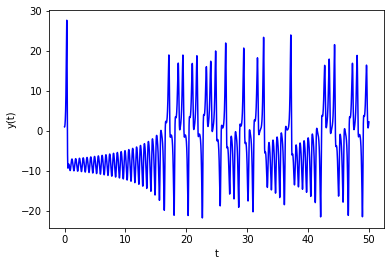

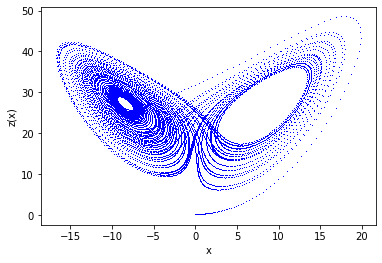

In [13]:
from numpy import arange,array
from pylab import plot, show, ylabel, xlabel, ylim
#defino las constantes
sigma=10
b=8/3
r=28
#método Runge-Kutta cuarto orden multidimensional
N=10000 #número de pasos
t0=0 #tiempo inicial
t1=50 #tiempo final
h=(t1-t0)/N #tamaño de paso
def f(vector,t): #defino las funciones de Lorentz
    x=vector[0]
    y=vector[1]
    z=vector[2]
    fx=sigma*(y-x)
    fy=r*x-y-x*z
    fz=x*y-b*z
    return array([fx,fy,fz], float) 
tpoints=arange(t0,t1,h) #array con el intervalo de tiempos
xpoints=[] #defino listas vacías
ypoints=[]
zpoints=[]
vector=array([0.0,1.0,0.0],float) #defino un vector con las condiciones iniciales
for t in tpoints:
    xpoints.append(vector[0])
    ypoints.append(vector[1])
    zpoints.append(vector[2])
    k1=h*f(vector,t)
    k2=h*f(vector+0.5*k1,t+0.5*h)
    k3=h*f(vector+0.5*k2,t+0.5*h)
    k4=h*f(vector+k3,t+h)
    vector+=(k1+2*k2+2*k3+k4)/6 
plot(tpoints,ypoints, 'b')  #represento y frente a t
ylabel("y(t)")
xlabel("t")
show()
plot(xpoints,zpoints, 'b,') #represento z frente a x
ylabel("z(x)")
xlabel("x")
show()

**Ejercicio 2. Difusión Térmica en la Corteza Terrestre**

Estudiar el problema de la difusión del calor en la corteza terrestre teniendo en cuenta las condiciones de contorno que cambian con el tiempo. Es decir, teniendo en cuenta que la temperatura de la superficie terrestre cambia con las estaciones.

Resolver la ecuación en derivadas parciales:

$$\frac{\partial T}{\partial t} = D \frac{\partial ^2 T}{\partial x^2}$$

Suponer que la temperatura media diaria en un punto particular de la superficie terrestre varia como sigue:

$$ T_0(t) = A + B \sin \left(\frac{2 \pi t}{\tau} \right)$$

donde $\tau = 365$ días, $A = 10^{\rm o} C$ y $B = 12^{\rm o} C$. Asumir que a una profundidad de $20  m$ de la superficie terrestre la temperatura permanece constante e igual a $11^{\rm o} C$. Asumir que la difusividad es constante con valor $D = 0.1 \ m^2 \ {\rm día}^{-1}$

1. Escribir un programa para calcular el perfíl de temperaturas de la corteza terrestre como función de la profundidad hasta $20 m$ de profundidad y tiempo hasta $10$ años. Asumir que en el instante inicial la temperatura es $10^{\rm o} C$ en todos los puntos menos en el punto más profundo que es $11^{\rm o} C$. Elegir valores para el número de puntos de la malla en $x$ y el paso del tiempo $h$. Ejecutar el programa por $9$ años para que se estabilicen los perfiles y para el décimo año, dibujar el perfíl de temperaturas a intervalos de $3$ meses en una misma gráfica, para ilustrar como cambia la temperatura como función del tiempo y la profundidad.

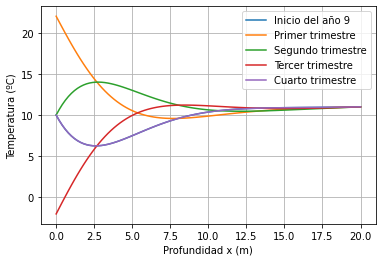

In [2]:
from numpy import empty,linspace
from math import sin, pi 
from pylab import plot, show, xlabel,ylabel, legend,grid
#defino las constantes
tau=365 #dias
A=10 #grados
B=12 #grados
D=0.1 #m**2/dia
L=20 #profundidad en m
N=100 #numero de divisiones en x
a=L/N #espaciado de la malla
h=0.01 #paso de tiempo en dias
epsilon=h/100
t0=9*365 #inicio del noveno año
t1=9.25*365 #primer trimestre del noveno año
t2=9.50*365 #segundo trimestre del noveno año
t3=9.75*365 #tercer trimestre del noveno año
t4=10*365 #cuarto trimestre del noveno año
tend=10*365+epsilon
#función de temperatura
def f(t):
    return A+B*sin(2*pi*t/tau)
T=empty(N+1,float) #temperaturas iniciales
T[N]=11 #fijo la temperatura en 20 metros de profundidad 
T[0]=f(0) #temperatura inicial en la superficie 
T[1:N]=10
Tp=empty(N+1,float) #nuevas temperaturas
Tp[N]=11
Tp[0]=f(0)
t=0.0 #tiempo inicial
c=h*D/a**2
x=linspace(0,20,N+1)
#Método FTCS
while t<tend:
    T[0]=f(t) #la temperatura en la superficie varía con el tiempo
    Tp[1:N]=T[1:N]+c*(T[2:N+1]+T[0:N-1]-2*T[1:N])
    T,Tp=Tp,T
    t+=h
    #Representación de los tiempos pedidos a partir del año 9 
    if abs(t-t0)<epsilon:
        plot(x,T,label='Inicio del año 9')
    if abs(t-t1)<epsilon:
        plot(x,T,label='Primer trimestre')
    if abs(t-t2)<epsilon:
        plot(x,T,label='Segundo trimestre')
    if abs(t-t3)<epsilon:
        plot(x,T,label='Tercer trimestre')
    if abs(t-t4)<epsilon:
        plot(x,T,label='Cuarto trimestre')
xlabel('Profundidad x (m)')
ylabel('Temperatura (ºC)')
grid()
legend()
show()

Como se puede observar en la gráfica, la temperatura en la superficie y en el interior varía según la época del año en que nos encontremos; así, es notable que en los primeros trimestres del año la temperatura en la superficie es mayor que en los últimos. Por otro lado, como bien indicaba el enunciado, a una profundidad de 20 metros, la temperatura se mantiene constante.